#### Este es un conjunto de ejemplos para correr el módulo de NI DAQmx en Python
El primer bloque indica los dispositivos que se encuentran conectadas al equipo.
Estos programas funcionan tanto con Hardware real como simulado. 
Para ambos casos, es necesario tener instalado los drivers oficiales que proporciona NI, así como el programa NI MAX (Measurement an Automation Explorer)

Para mayor información, pueden checar estos links:

[Crear equipo NI DAQ Simulado](https://knowledge.ni.com/KnowledgeArticleDetails?id=kA03q000000x0PxCAI&l=es-MX "Create Simulated NI-DAQmx Devices in NI MAX")

[Descargar los drivers de NI](https://www.ni.com/es-mx/support/downloads/drivers/download.ni-daqmx.html#460239 "NI DAQmx Driver Download")

[Paquete NI DAQmx para Python](https://nidaqmx-python.readthedocs.io/en/latest/index.html# "NI-DAQmx Python Documentation")

In [8]:
import nidaqmx
system = nidaqmx.system.System.local()
for device in system.devices:   
    print(device)

Device(name=cDAQ1)
Device(name=cDAQ1Mod1)
Device(name=Dev1)


In [5]:
import nidaqmx
from nidaqmx.constants import AcquisitionType
from nidaqmx.constants import BridgeConfiguration
from nidaqmx.constants import BridgeElectricalUnits
from nidaqmx.constants import ForceUnits
from nidaqmx.constants import ExcitationSource
from nidaqmx.constants import Edge

with nidaqmx.Task() as task:
    task.ai_channels.add_ai_force_bridge_two_point_lin_chan("cDAQ1Mod4/ai0",
    name_to_assign_to_channel="loadcell",
    min_val=-100.0, max_val=100.0,
    units=ForceUnits.NEWTONS, bridge_config=BridgeConfiguration.FULL_BRIDGE,
    voltage_excit_source=ExcitationSource.INTERNAL, voltage_excit_val=2.5, 
    nominal_bridge_resistance=350.0, first_electrical_val=0.0, second_electrical_val=2.0,
    electrical_units=BridgeElectricalUnits.MILLIVOLTS_PER_VOLT, first_physical_val=0.0,
    second_physical_val=100.0, custom_scale_name=None)

    task.timing.cfg_samp_clk_timing(rate=1000, active_edge=Edge.RISING,
    sample_mode=AcquisitionType.CONTINUOUS, samps_per_chan=100)
    
    values = task.read(number_of_samples_per_channel=100)
    print(values)
    

[-7.481437975767322, 1.105611636713023, -4.295844734734474, 5.087934606360411, 1.8844447740858061, 0.45934584187177757, -1.3316389557292947, 7.005521216079101, 6.060978900541897, 5.070038015118653, -3.3652219901630804, 7.059873826517032, 4.985194915898469, 2.1833841314944236, -0.8073351160170636, -4.990497609599731, -3.6913376527906627, 0.5561200019198, -2.5486071601688094, -2.1171004602286545, 10.374720226518129, 2.384223655429703, -2.362350043911999, -3.9259818490714844, -3.7098970807450784, 1.9765790771452247, 4.435703281105246, 5.180731746132487, 5.791867195202875, 6.025185718058381, -0.43614655692875853, 7.167916210680235, 4.136763923696629, 2.8091019882432806, -1.46486913497349, 6.947191585365225, 9.733757125378144, 10.175869212720823, 6.087492369048204, 2.9708341461317564, 11.733535487466389, 9.646262679307329, 13.236849151774024, 12.935921284227433, 7.293192349372538, 1.490056930054482, 6.438132990044121, 3.1895702613087935, 12.74502431098202, 3.108041345651898, 11.811087382847

In [16]:
import nidaqmx
import time

from nidaqmx.constants import AcquisitionType
from nidaqmx.constants import BridgeConfiguration
from nidaqmx.constants import BridgeElectricalUnits
from nidaqmx.constants import ForceUnits
from nidaqmx.constants import ExcitationSource
from nidaqmx.constants import Edge

with nidaqmx.Task() as task:
    task.ai_channels.add_ai_force_bridge_two_point_lin_chan("cDAQ1Mod4/ai0",
    name_to_assign_to_channel="loadcell",
    min_val=-100.0, max_val=100.0,
    units=ForceUnits.NEWTONS, bridge_config=BridgeConfiguration.FULL_BRIDGE,
    voltage_excit_source=ExcitationSource.INTERNAL, voltage_excit_val=2.5, 
    nominal_bridge_resistance=350.0, first_electrical_val=0.0, second_electrical_val=2.0,
    electrical_units=BridgeElectricalUnits.MILLIVOLTS_PER_VOLT, first_physical_val=0.0,
    second_physical_val=100.0, custom_scale_name=None)

    task.timing.cfg_samp_clk_timing(rate=100, active_edge=Edge.RISING,
    sample_mode=AcquisitionType.CONTINUOUS, samps_per_chan=100)

    i = 5
    Ts = 1 # [seg]

    for k in range(i):
        value =task.read(number_of_samples_per_channel=50)
        print(value)
        time.sleep(Ts)

[-7.481437975767322, 1.105611636713023, -4.295844734734474, 5.087934606360411, 1.8844447740858061, 0.45934584187177757, -1.3316389557292947, 7.005521216079101, 6.060978900541897, 5.070038015118653, -3.3652219901630804, 7.059873826517032, 4.985194915898469, 2.1833841314944236, -0.8073351160170636, -4.990497609599731, -3.6913376527906627, 0.5561200019198, -2.5486071601688094, -2.1171004602286545, 10.374720226518129, 2.384223655429703, -2.362350043911999, -3.9259818490714844, -3.7098970807450784, 1.9765790771452247, 4.435703281105246, 5.180731746132487, 5.791867195202875, 6.025185718058381, -0.43614655692875853, 7.167916210680235, 4.136763923696629, 2.8091019882432806, -1.46486913497349, 6.947191585365225, 9.733757125378144, 10.175869212720823, 6.087492369048204, 2.9708341461317564, 11.733535487466389, 9.646262679307329, 13.236849151774024, 12.935921284227433, 7.293192349372538, 1.490056930054482, 6.438132990044121, 3.1895702613087935, 12.74502431098202, 3.108041345651898]
[11.81108738284

Fuerza:  -7.5 [N]
Fuerza:  1.1 [N]
Fuerza:  -4.3 [N]
Fuerza:  5.1 [N]
Fuerza:  1.9 [N]
Fuerza:  0.5 [N]
Fuerza:  -1.3 [N]
Fuerza:  7.0 [N]
Fuerza:  6.1 [N]
Fuerza:  5.1 [N]
Fuerza:  -3.4 [N]
Fuerza:  7.1 [N]
Fuerza:  5.0 [N]
Fuerza:  2.2 [N]
Fuerza:  -0.8 [N]
Fuerza:  -5.0 [N]
Fuerza:  -3.7 [N]
Fuerza:  0.6 [N]
Fuerza:  -2.5 [N]
Fuerza:  -2.1 [N]
Fuerza:  10.4 [N]
Fuerza:  2.4 [N]
Fuerza:  -2.4 [N]
Fuerza:  -3.9 [N]
Fuerza:  -3.7 [N]
Fuerza:  2.0 [N]
Fuerza:  4.4 [N]
Fuerza:  5.2 [N]
Fuerza:  5.8 [N]
Fuerza:  6.0 [N]
Fuerza:  -0.4 [N]
Fuerza:  7.2 [N]
Fuerza:  4.1 [N]
Fuerza:  2.8 [N]
Fuerza:  -1.5 [N]
Fuerza:  6.9 [N]
Fuerza:  9.7 [N]
Fuerza:  10.2 [N]
Fuerza:  6.1 [N]
Fuerza:  3.0 [N]
Fuerza:  11.7 [N]
Fuerza:  9.6 [N]
Fuerza:  13.2 [N]
Fuerza:  12.9 [N]
Fuerza:  7.3 [N]
Fuerza:  1.5 [N]
Fuerza:  6.4 [N]
Fuerza:  3.2 [N]
Fuerza:  12.7 [N]
Fuerza:  3.1 [N]


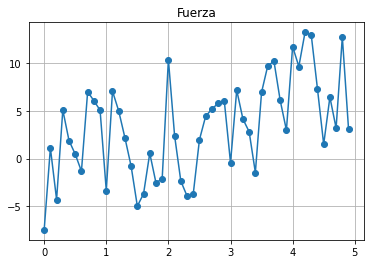

In [23]:
import nidaqmx
import time
import numpy as np
import matplotlib.pyplot as plt

from nidaqmx.constants import AcquisitionType
from nidaqmx.constants import BridgeConfiguration
from nidaqmx.constants import BridgeElectricalUnits
from nidaqmx.constants import ForceUnits
from nidaqmx.constants import ExcitationSource
from nidaqmx.constants import Edge

Tstop = 5
Ts = 0.1
N = int(Tstop/Ts)
data = []

with nidaqmx.Task() as task:
    task.ai_channels.add_ai_force_bridge_two_point_lin_chan("cDAQ1Mod4/ai0",
    name_to_assign_to_channel="loadcell",
    min_val=-100.0, max_val=100.0,
    units=ForceUnits.NEWTONS, bridge_config=BridgeConfiguration.FULL_BRIDGE,
    voltage_excit_source=ExcitationSource.INTERNAL, voltage_excit_val=2.5, 
    nominal_bridge_resistance=350.0, first_electrical_val=0.0, second_electrical_val=2.0,
    electrical_units=BridgeElectricalUnits.MILLIVOLTS_PER_VOLT, first_physical_val=0.0,
    second_physical_val=100.0, custom_scale_name=None)

    task.timing.cfg_samp_clk_timing(rate=100, active_edge=Edge.RISING,
    sample_mode=AcquisitionType.CONTINUOUS, samps_per_chan=10)

    for k in range(N):
        value = task.read()
        print("Fuerza: ", round(value,1), "[N]")
        data.append(value)
        time.sleep(Ts)

t = np.arange(0,Tstop,Ts)
plt.plot(t,data, "-o")
plt.title("Fuerza")
plt.grid()
plt.show()

F:  -7.5 [N]
F:  1.1 [N]
F:  -4.3 [N]
F:  5.1 [N]
F:  1.9 [N]
F:  0.5 [N]
F:  -1.3 [N]
F:  7.0 [N]
F:  6.1 [N]
F:  5.1 [N]
F:  -3.4 [N]
F:  7.1 [N]
F:  5.0 [N]
F:  2.2 [N]
F:  -0.8 [N]
F:  -5.0 [N]
F:  -3.7 [N]
F:  0.6 [N]
F:  -2.5 [N]
F:  -2.1 [N]
F:  10.4 [N]
F:  2.4 [N]
F:  -2.4 [N]
F:  -3.9 [N]
F:  -3.7 [N]
F:  2.0 [N]
F:  4.4 [N]
F:  5.2 [N]
F:  5.8 [N]
F:  6.0 [N]
F:  -0.4 [N]
F:  7.2 [N]
F:  4.1 [N]
F:  2.8 [N]
F:  -1.5 [N]
F:  6.9 [N]
F:  9.7 [N]
F:  10.2 [N]
F:  6.1 [N]
F:  3.0 [N]
F:  11.7 [N]
F:  9.6 [N]
F:  13.2 [N]
F:  12.9 [N]
F:  7.3 [N]
F:  1.5 [N]
F:  6.4 [N]
F:  3.2 [N]
F:  12.7 [N]
F:  3.1 [N]


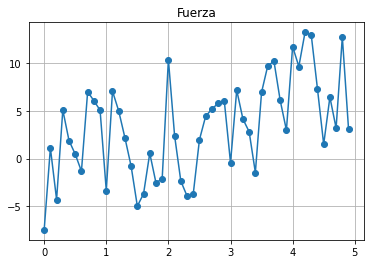

In [24]:
import nidaqmx
import time
import numpy as np
import matplotlib.pyplot as plt

from nidaqmx.constants import AcquisitionType
from nidaqmx.constants import BridgeConfiguration
from nidaqmx.constants import BridgeElectricalUnits
from nidaqmx.constants import ForceUnits
from nidaqmx.constants import ExcitationSource
from nidaqmx.constants import Edge

Tstop = 5
Ts = 0.1
N = int(Tstop/Ts)
data = []

with nidaqmx.Task() as task:
    task.ai_channels.add_ai_force_bridge_two_point_lin_chan("cDAQ1Mod4/ai0",
    name_to_assign_to_channel="loadcell",
    min_val=-100.0, max_val=100.0,
    units=ForceUnits.NEWTONS, bridge_config=BridgeConfiguration.FULL_BRIDGE,
    voltage_excit_source=ExcitationSource.INTERNAL, voltage_excit_val=2.5, 
    nominal_bridge_resistance=350.0, first_electrical_val=0.0, second_electrical_val=2.0,
    electrical_units=BridgeElectricalUnits.MILLIVOLTS_PER_VOLT, first_physical_val=0.0,
    second_physical_val=100.0, custom_scale_name=None)

    task.timing.cfg_samp_clk_timing(rate=100, active_edge=Edge.RISING,
    sample_mode=AcquisitionType.CONTINUOUS, samps_per_chan=10)

    file = open("fuerza.txt", "w")

    def writefiledata(t, x):
        time = str(t)
        value = str(round(x, 2))
        file.write(time + "\t" + value)
        file.write("\n")

    for k in range (N):
        value = task.read()
        print("F: ", round(value,1), "[N]")
        data.append(value)
        time.sleep(Ts)
        writefiledata(k*Ts, value)

    file.close()

t = np.arange(0,Tstop,Ts)
plt.plot(t,data, "-o")
plt.title("Fuerza")
plt.grid()
plt.show()
    

In [1]:
import nidaqmx

local_system = nidaqmx.system.System.local()
driver_version = local_system.driver_version

print('DAQmx {0}.{1}.{2}'.format(driver_version.major_version, driver_version.minor_version,
                                 driver_version.update_version))

for device in local_system.devices:
    print('Device Name: {0}, Product Category: {1}, Product Type: {2}'.format(
        device.name, device.product_category, device.product_type))

DAQmx 21.0.0
Device Name: cDAQ1, Product Category: ProductCategory.COMPACT_DAQ_CHASSIS, Product Type: cDAQ-9174
Device Name: cDAQ1Mod1, Product Category: ProductCategory.C_SERIES_MODULE, Product Type: NI 9201
Device Name: cDAQ1Mod2, Product Category: ProductCategory.C_SERIES_MODULE, Product Type: NI 9234
Device Name: cDAQ1Mod3, Product Category: ProductCategory.C_SERIES_MODULE, Product Type: NI 9215
Device Name: cDAQ1Mod4, Product Category: ProductCategory.C_SERIES_MODULE, Product Type: NI 9237
Device Name: Dev1, Product Category: ProductCategory.USBDAQ, Product Type: USB-6009
